In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize, special
import scipy.io

In [2]:
data = np.genfromtxt("ex2data1.txt", delimiter=",")

In [3]:
X = data[:,:2]
y = data[:,2]
y = y[:,np.newaxis]
m = len(X)
theta = np.zeros((X.shape[1]+1,1))
X = np.concatenate((np.ones((m,1)),X),axis=1)
y.shape

(100, 1)

In [4]:
theta.transpose()

array([[ 0.,  0.,  0.]])

In [22]:
colormap=np.array(['r','b'])
custom_color = colormap[y.astype(int)].flatten()
markermap = np.array(['o','x'])
custom_markers = markermap[y.astype(int)].flatten()

IndexError: index 2 is out of bounds for axis 1 with size 2

IndexError: index 100 is out of bounds for axis 0 with size 100

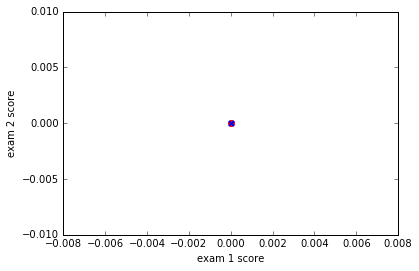

In [23]:
plt.ylabel('exam 2 score')
plt.xlabel('exam 1 score')
for i in range(len(X[:,0])):
    plt.scatter(X[:,1][i],X[:,2][i],color=custom_color[i], marker=custom_markers[i])


In [5]:
def predict(X,theta):
    return special.expit(np.dot(X,theta))


In [6]:
def cost(theta):
    if len(theta.shape) == 1:
        theta = theta[:,np.newaxis]
    prediction = predict(X,theta)
    return 1/m*np.sum(np.dot((-y.T),np.log(prediction))-np.dot((1-y).T,np.log(1-prediction)))

In [12]:
def regularized_cost(theta,gamma=0.1):
    #print(y)
    if len(theta.shape) == 1:
        theta = theta[:,np.newaxis]
    prediction = predict(X,theta)
    regularizer = np.sum(np.delete(theta,0,0))
    return 1/m*np.sum(np.dot((-y.T),np.log(prediction))-np.dot((1-y).T,np.log(1-prediction)))+(gamma/(2*m))*regularizer

In [8]:
def gradient(theta):
    if len(theta.shape) == 1:
        theta = theta[:,np.newaxis]
    return 1/m * ((np.dot(X.T,(predict(X,theta)-y))))#-np.dot(X.T,y)).T)

In [9]:
def regularized_gradient(theta,gamma=0.1):
    #print(y)
    if len(theta.shape) == 1:
        theta = theta[:,np.newaxis]
    regularizer = (gamma/m) * (np.insert(np.delete(theta,0,0),0,0,0))
    #print(regularizer.shape)
    grad = (1/m * ((np.dot(X.T,(predict(X,theta)-y))))) + regularizer
    return grad.flatten()


In [10]:
def minimize(theta):
    #return optimize.fmin(regularized_cost,theta)
    return optimize.fmin_tnc(regularized_cost,theta,fprime=regularized_gradient)

In [13]:
a = minimize(theta)
regularized_cost(a[0])

0.20370162708282757

In [14]:
regularized_cost(theta)

0.69314718055994529

In [62]:
new_labels = np.copy(y)
np.place(new_labels,new_labels==3,1) 
np.place(new_labels,new_labels!=1,0)
y = new_labels

In [64]:
new_labels

array([[0],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]], dtype=uint8)

In [42]:
theta

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      